### 1) Importing Libraries and Dataset

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing India_Tv_Commerce.csv dataframe

path = r'/Users/matthewabrams/Downloads/India_Tv_Commerce.csv'
tv = pd.read_csv(os.path.join(path), index_col = False)
tv 

,Brand,Column1,Resolution,Size,Selling Price in US dollars,Selling Price in Indian Rupees,Original Price in Indian Rupees,Percent Off,Operating System,Rating
0,Hisense,NaN,QLED Ultra HD,75,6499.87,499990,499990,0%,Android,4.2
1,Samsung,NaN,QLED Ultra HD,65,6121.70,470900,470900,0%,Tizen,4.2
2,SONY,NaN,Ultra HD LED,65,6109.99,469999,529900,11%,Android,5.0
3,Sharp,NaN,Full HD LED,70,5848.70,449900,449900,0%,Linux,4.2
4,Samsung,NaN,Full HD LED,75,5458.70,419900,419900,0%,Tizen,4.2
...,...,...,...,...,...,...,...,...,...,...
907,RGL,NaN,Full HD LED,24,70.97,5459,12000,55%,HomeOS,3.9
908,Micromax,NaN,HD LED,20,69.73,5364,10990,51%,Android,4.1
909,RGL,NaN,Full HD LED,21,67.60,5200,9420,45%,HomeOS,3.9
910,RGL,NaN,Full HD LED,21,67.60,5200,9420,45%,HomeOS,3.9


### 2) Developing a linear regression for Selling Price and Rating column

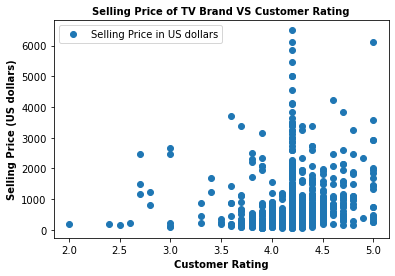

In [3]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

tv.plot(x = 'Rating', y ='Selling Price in US dollars', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Selling Price of TV Brand VS Customer Rating', fontsize = 10, fontweight = 'bold')  
plt.xlabel('Customer Rating', fontsize = 10, fontweight = 'bold')  
plt.ylabel('Selling Price (US dollars)', fontsize = 10, fontweight = 'bold')  
plt.show()

In [4]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = tv['Rating'].values.reshape(-1,1)
y = tv['Selling Price in US dollars'].values.reshape(-1,1)

In [5]:
#### 2a) Compare how the regression fits the testing set

In [6]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

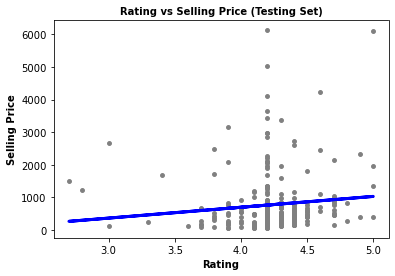

In [9]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color= 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color= 'blue', linewidth = 3)
plot_test.title('Rating vs Selling Price (Testing Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Rating', fontsize = 10, fontweight = 'bold')
plot_test.ylabel('Selling Price', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [10]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted).round() # This is the mean squared error
r2 = r2_score(y_test, y_predicted).round(3) # This is the R2 score. 

In [11]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_.round(1))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[332.3]]
Mean squared error:  819845.0
R2 score:  0.002


In [12]:
# Since this linear regression model is less than 1% effective for my testing set, it's not the best fit for my data. 
# This could be due to data bias or not enough data points to produce significant results. 

In [13]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,817.70,667.194498
1,246.99,733.657409
2,1330.23,766.888865
3,207.99,733.657409
4,1329.77,766.888865
5,584.99,866.583232
6,2209.87,766.888865
7,69.73,733.657409
8,1819.87,866.583232
9,3639.87,766.888865


In [14]:
# The predicted values are extremely far from the actual values

#### 2b) Compare how the regression fits the training set

In [15]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [16]:
rmse = mean_squared_error(y_train, y_predicted_train).round()
r2 = r2_score(y_train, y_predicted_train).round(3)

In [17]:
print('Slope:' ,regression.coef_.round(1))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[332.3]]
Mean squared error:  682111.0
R2 score:  0.017


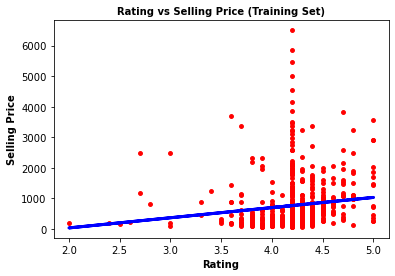

In [18]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='red', s = 15)
plot_test.plot(X_train, y_predicted_train, color='blue', linewidth =3)
plot_test.title('Rating vs Selling Price (Training Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Rating', fontsize = 10, fontweight = 'bold')
plot_test.ylabel('Selling Price', fontsize = 10, fontweight = 'bold')
plot_test.show()

### 3) Summary

In [19]:
# There is a weak correlation between Customer Rating and Selling Price of Televisions
# May be helpful if I had more data points
# Since using a Linear Regression model for my variables is not strong, I'd have to use another model that's non-linear